# Data Sequence

## Load Dataset

In [1]:
import pandas as pd

df = pd.read_csv('../data/precio_mercado_diario.csv', parse_dates=['datetime_utc'], index_col=0)
df = df.loc["2020":].copy()
df

,Mercado SPOT
datetime_utc,
2020-01-01 00:00:00+00:00,38.60
2020-01-01 01:00:00+00:00,36.55
...,...
2023-08-04 20:00:00+00:00,94.00
2023-08-04 21:00:00+00:00,91.70


## Data Preprocessing

### Train Test Split

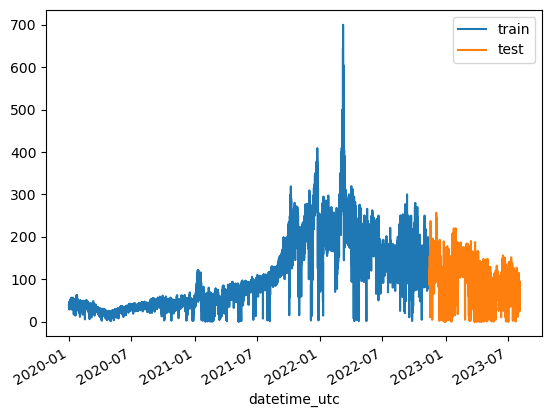

In [2]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.2, shuffle=False)

import matplotlib.pyplot as plt

train['Mercado SPOT'].plot(label='train')
test['Mercado SPOT'].plot(label='test')
plt.legend();

### Create Sequences

In [3]:
import numpy as np

def create_sequences(df, sequence_length):
    X, y = [], []
    for i in range(len(df) - sequence_length):
        X.append(df.iloc[i:i+sequence_length])
        y.append(df.iloc[i+sequence_length])
    return np.array(X), np.array(y)

sequence_length = 3
X_train, y_train = create_sequences(train, sequence_length)
X_train[0]

array([[38.6 ],
       [36.55],
       [32.32]])

In [4]:
y_train[0]

array([30.85])

In [5]:
sequence_length = 24
X_train, y_train = create_sequences(train, sequence_length)
X_test, y_test = create_sequences(test, sequence_length)
X_train

array([[[ 38.6 ],
        [ 36.55],
        [ 32.32],
        ...,
        [ 42.9 ],
        [ 37.55],
        [ 35.4 ]],

       [[ 36.55],
        [ 32.32],
        [ 30.85],
        ...,
        [ 37.55],
        [ 35.4 ],
        [ 31.98]],

       [[ 32.32],
        [ 30.85],
        [ 30.14],
        ...,
        [ 35.4 ],
        [ 31.98],
        [ 30.5 ]],

       ...,

       [[158.26],
        [150.8 ],
        [155.57],
        ...,
        [148.67],
        [155.48],
        [155.63]],

       [[150.8 ],
        [155.57],
        [136.87],
        ...,
        [155.48],
        [155.63],
        [159.81]],

       [[155.57],
        [136.87],
        [149.29],
        ...,
        [155.63],
        [159.81],
        [148.67]]])

### Build LSTM Model

In [6]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Input

model = Sequential(layers=[
    Input(shape=(X_train.shape[1], X_train.shape[2])),
    LSTM(50),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')